# 수학적모델설계 기말과제
### (2014603043 최재익)

#### 전체적인 내용은 다음과 같습니다.

* 증명(proof)을 요구하는 문제는 **직접** 풀이한다.

* 근삿값 및 오차를 구하는 문제는 **Python을 사용하여** 풀이한다. 

#### Python을 사용하여 풀이한 이유는 다음과 같습니다.

1. 같은 출력값을 얻게 된다면, 구조적인 알고리즘을 **자세하게** 확인할 수 있는 방법이 실용적입니다.


2. Python은 **간결**하며 **직관적**인 알고리즘 구성이 가능합니다. (제출자, 채점자 모두에게 효율적입니다.)

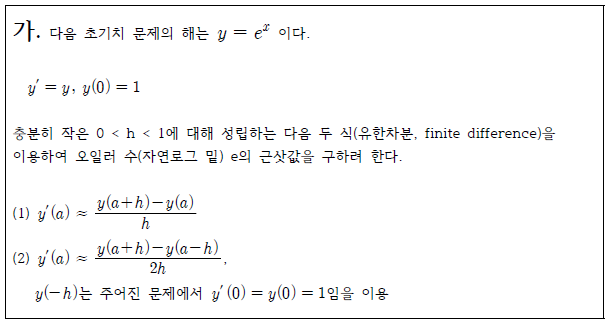

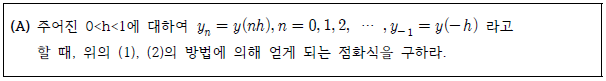

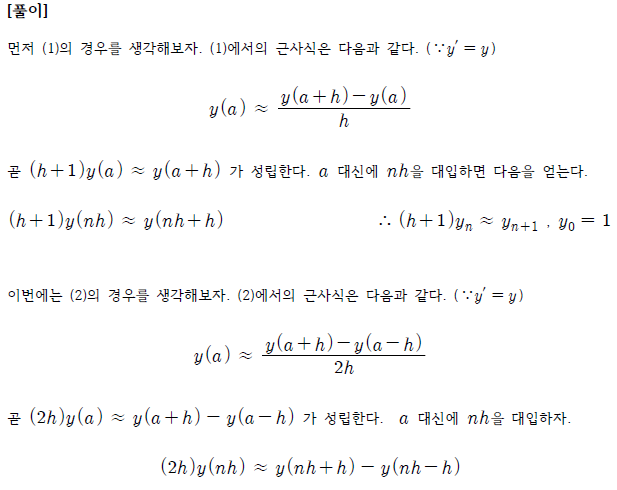

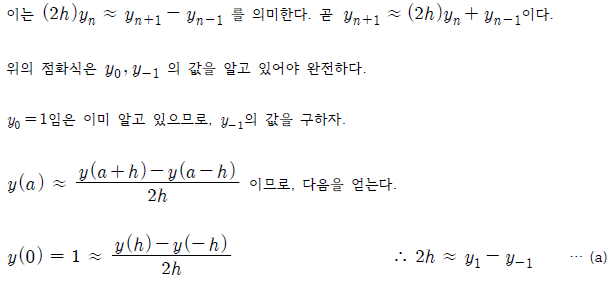

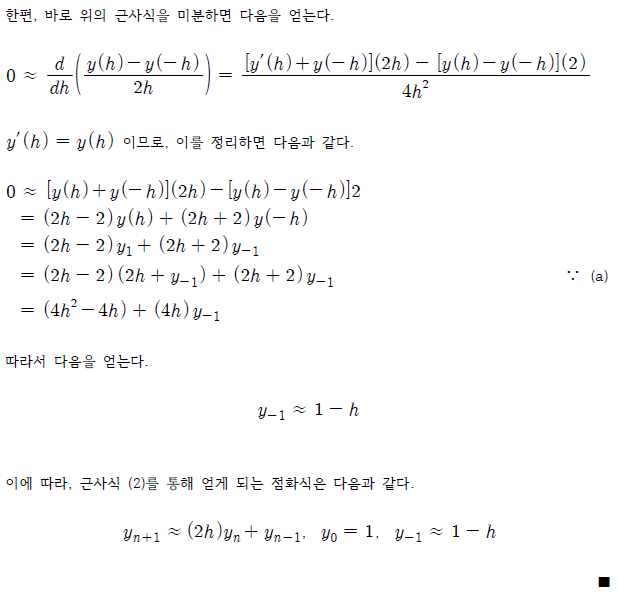


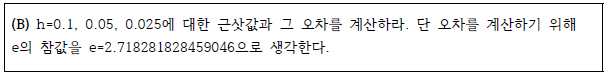

#### [풀이]
방법 (1)에 h = 0.1, 0.05, 0.025를 가정했을 때, 근삿값은 각각 다음과 같다.

In [1]:
def approximationP1(h):
    y = 1
    N = int(1/h)
    for i in range(N):
        y = (h+1) * y
    return y

In [2]:
approximationP1(0.1)

2.5937424601000023

In [3]:
approximationP1(0.05)

2.6532977051444226

In [4]:
approximationP1(0.025)

2.685063838389963

방법 (2)에 h = 0.1, 0.05, 0.025를 가정했을 때, 근삿값은 각각 다음과 같다.

In [5]:
def approximationP2(h):
    y_0 = 1
    y_minus1 = 1 - h
    N = int(1/h)
    for i in range(N):
        y = 2 * h * y_0 + y_minus1
        y_minus1 = y_0
        y_0 = y
    return y

In [6]:
approximationP2(0.1)

2.7079557631999998

In [7]:
approximationP2(0.05)

2.7156852670476446

In [8]:
approximationP2(0.025)

2.7176317403251202

또한, 오차를 계산하기 위해 다음과 같은 함수를 만든다.

In [9]:
def error(x):
    return x - 2.718281828459046

이를 이용하여 h = 0.1, 0.05, 0.025에 대한 방법 (1)의 오차를 계산하면 다음과 같다.

In [10]:
error(approximationP1(0.1))

-0.12453936835904367

In [11]:
error(approximationP1(0.05))

-0.06498412331462333

In [12]:
error(approximationP1(0.025))

-0.03321799006908277

또한, h = 0.1, 0.05, 0.025에 대한 방법 (2)의 오차를 계산하면 다음과 같다.

In [13]:
error(approximationP2(0.1))

-0.010326065259046224

In [14]:
error(approximationP2(0.05))

-0.00259656141140141

In [15]:
error(approximationP2(0.025))

-0.0006500881339257525

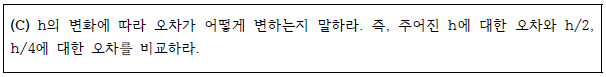

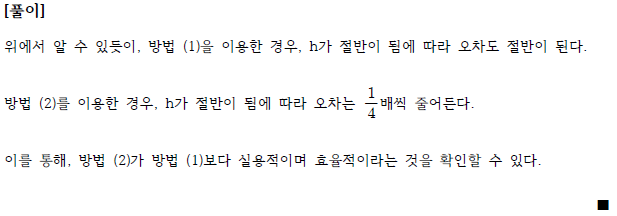

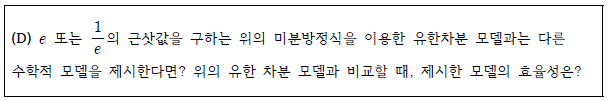

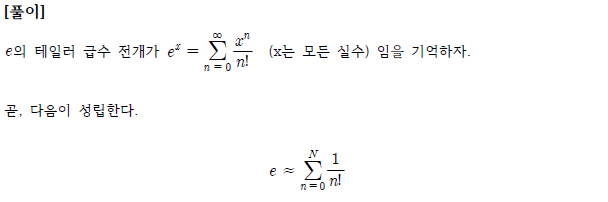

이에 대한 Python 함수는 다음과 같다.

In [16]:
def partitionsum(N):
    x = 1
    acc = 0
    for i in range(N):
        if i == 0:
            acc = acc + 1
        else:
            acc = acc + (1/x)
            x = x * (x + 1)
            
    return acc

In [17]:
partitionsum(10)

2.6910302067572536

In [18]:
partitionsum(15)

2.6910302067572536

In [19]:
partitionsum(20)

2.6910302067572536

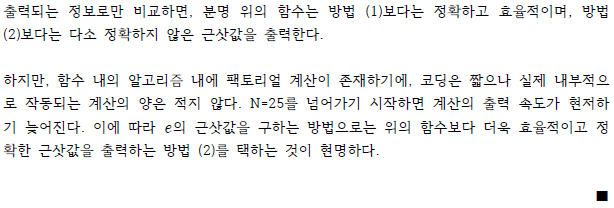

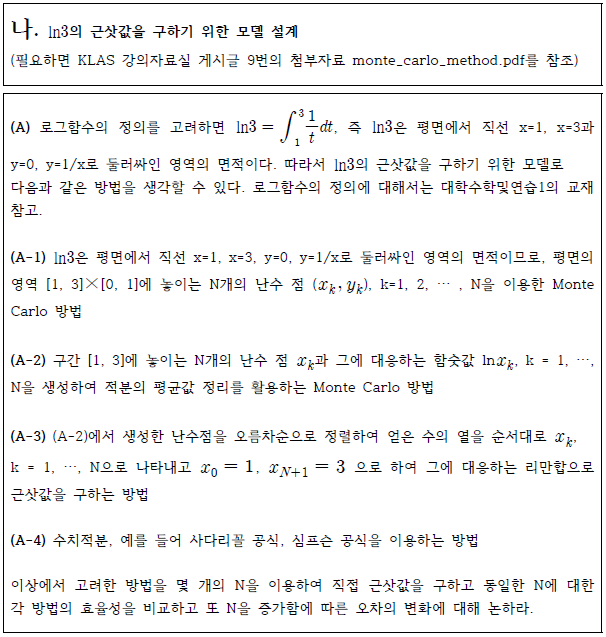

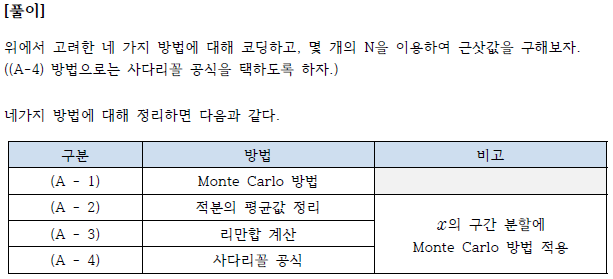

아래의 Python 함수는 N이 주어지면 이에 따라 각각의 방법에 대한 근삿값을 출력해낸다.

In [20]:
def MonteCarlo(N):
    
    import random
    cnt = 0
    ftnsum = 0
    uppersum = 0
    trpzdsum = 0
    list = []
    
    for i in range(N):
        x = random.random() * 2 + 1
        y = random.random()
        list.insert(i,x)
        ftnsum = ftnsum + 1/x
        if y < 1/x:
            cnt = cnt + 1
            
    list.sort()
    for i in range(N-1):
        uppersum = uppersum + (list[i+1]-list[i])/list[i]
        trpzdsum = trpzdsum + ((1/list[i])+(1/list[i+1])) * (list[i+1]-list[i])/2
        
        A1 = (cnt/N) * 2
        A2 = (ftnsum/N) * 2
        A3 = uppersum
        A4 = trpzdsum
        answer = [A1, A2, A3, A4]
        
        return answer

In [21]:
MonteCarlo(1000)

[1.066, 1.0937222558163262, 0.000629384636129211, 0.000629186698198206]

In [22]:
MonteCarlo(10000)

[1.1204, 1.1008640727262407, 0.0002249453802744419, 0.00022492008575227438]

In [23]:
MonteCarlo(100000)

[1.1013, 1.0979986759512346, 3.149059151066331e-05, 3.1490095697599915e-05]

이를 통해, N이 증가함에 따라 모든 방법들의 정확도가 높아짐을 확인할 수 있다.

(Python 내장 함수를 이용해 얻는 ln3의 값은 1.0986122886681098이다.)

각각의 방법으로 얻은 값들과 실제 값과의 '편차의 제곱'을 구하는 함수를 만들자.

In [24]:
def deviation(N):
    import math
    alist = MonteCarlo(N)
    blist = []
    for i in range(4):
        x = (math.log(3)-alist[i])*(math.log(3)-alist[i])
        blist.insert(i,x)
    
    return blist

In [25]:
deviation(1000)

[2.1273206757973136e-05,
 0.0001034173651529762,
 1.2017294295906327,
 1.2017356144103033]

In [26]:
deviation(10000)

[4.049305683802963e-06,
 2.619977141153047e-06,
 1.2069227299084337,
 1.206922730065007]

In [27]:
deviation(100000)

[9.936923847092711e-06,
 2.8236493980310588e-06,
 1.2069231269802339,
 1.2069231271321026]

In [28]:
deviation(1000000)

[2.0670138738454648e-06,
 4.1988297460393096e-08,
 1.206943580069136,
 1.2069435800757242]

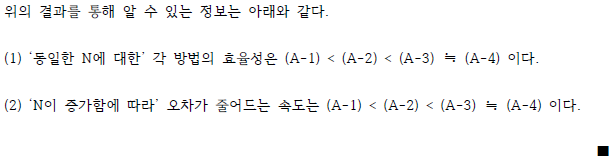



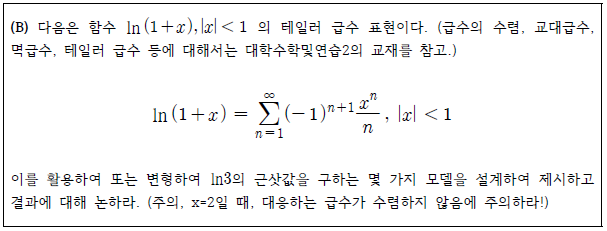

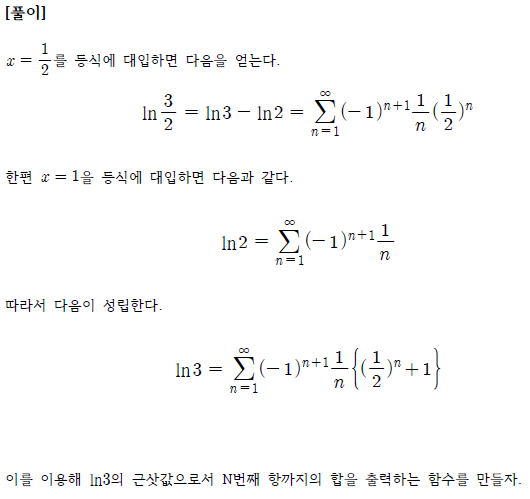

In [29]:
def partition_sum(N):
    sum = 0
    sign = 1
    frac = 1/2
    for i in range(N):
        sum = sum + sign * 1/(i+1) * (frac + 1)
        sign = sign * (-1)
        frac = frac / 2
        
    return sum

In [30]:
partition_sum(10)

1.051069568452381

In [31]:
partition_sum(100)

1.0936372874183593

In [32]:
partition_sum(1000)

1.0981125386679842

In [33]:
partition_sum(10000)

1.0985622911680957

이 방법 또한 N이 커질수록 정확도가 높은 근삿값을 출력함을 확인할 수 있다.

(Python 내장 함수를 이용해 얻는 ln3의 값은 1.0986122886681098이다.)

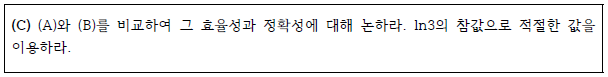

#### [풀이]

문제 가 - (B)에서 사용한 deviation(N)함수를 활용할 것이다.

(ln3의 참값으로는 Python 내장 함수를 이용해 얻는 ln3의 값을 사용하고자 한다.)

In [34]:
def eachdeviation(N):
    import math
    clist = deviation(N)
    a = partition_sum(N)
    x = (math.log(3)-a)*(math.log(3)-a)
    clist.insert(4,x)
    
    return clist

In [35]:
eachdeviation(100)

[0.019213366569811405,
 9.955313735383893e-05,
 1.1936672799863524,
 1.1937071804021742,
 2.475063743501881e-05]

In [36]:
eachdeviation(1000)

[0.0001792308147060244,
 0.00023639583849813104,
 1.2059258385481118,
 1.2059260766420874,
 2.4975006262552444e-07]

In [37]:
eachdeviation(10000)

[3.1222517928535136e-05,
 4.837243882799302e-06,
 1.2065551340151113,
 1.2065551693032088,
 2.4997500076608813e-09]

In [38]:
eachdeviation(100000)

[4.69897241840566e-06,
 2.49790667260865e-07,
 1.2068337365719755,
 1.2068337395930433,
 2.4999750198550585e-11]

위의 함수는 (A-1) ~ (A-4)와 (B)의 방법을 통해 얻어낸 근삿값의 실제 값과의 편차의 제곱에 대한 값을 출력한다.

따라서, 동일한 N에 대해 오차가 가장 작은 방법은 (B)라는 것을 확인할 수 있다.

곧, (B)의 방법이 효율성과 정확성의 관점에서 (주어진 방법들 중에서) 가장 우수하다.

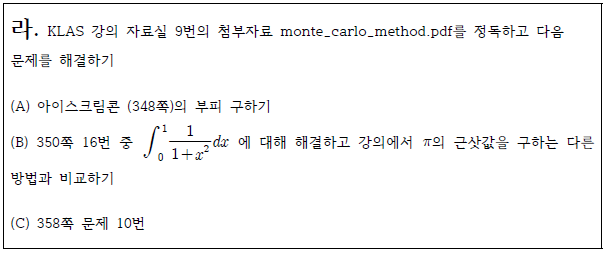

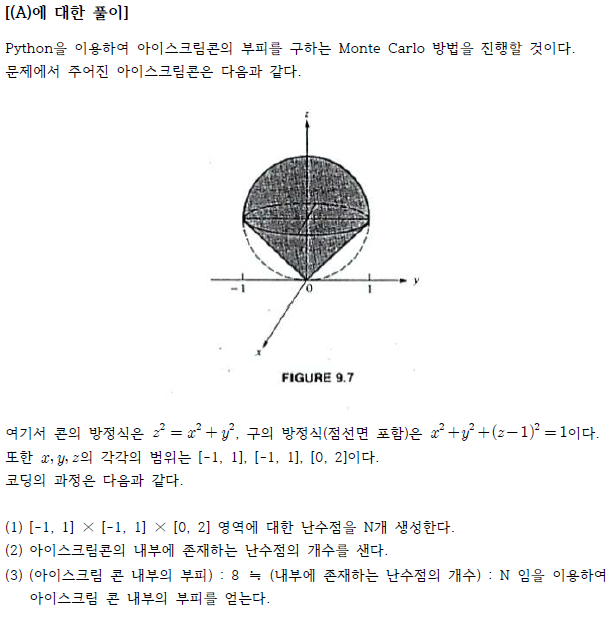

이를 Python 함수로 나타내면 다음과 같다.

In [39]:
def MonteCarloicecreamcone(N):
    import random
    acc = 0
    for i in range(N):
        x = random.random() * 2 - 1
        y = random.random() * 2 - 1
        z = random.random() * 2
        
        if x*x + y*y + (z-1)*(z-1) <= 1 and z*z >= x*x + y*y:
            acc = acc + 1
            
    return (acc/N) * 8

In [40]:
MonteCarloicecreamcone(100)

3.12

In [41]:
MonteCarloicecreamcone(1000)

3.28

In [42]:
MonteCarloicecreamcone(10000)

3.1232

In [43]:
MonteCarloicecreamcone(100000)

3.14032

In [44]:
MonteCarloicecreamcone(1000000)

3.140944

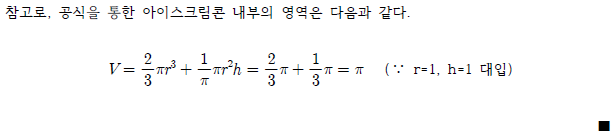

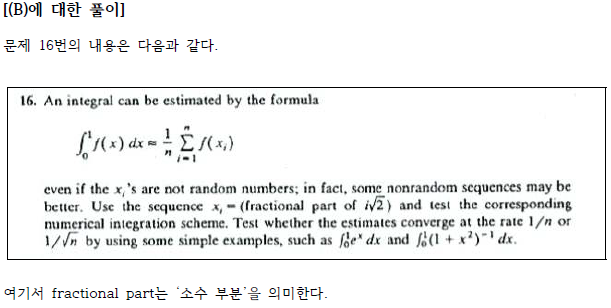

In [45]:
def fractionalpart(N):
    list = []
    import math
    for i in range(N):
        x = math.sqrt(2) * (i+1)
        y = x - math.floor(x)
        list.insert(i,y)
        
    return list

In [46]:
fractionalpart(3)

[0.41421356237309515, 0.8284271247461903, 0.24264068711928566]

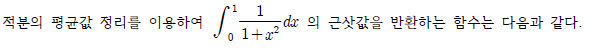

In [47]:
def mvtsum(N):
    sum = 0
    list = fractionalpart(N)
    for i in range(N):
        x = list[i]
        sum = sum + 1/(1+x*x)
        
    return sum/N

In [48]:
mvtsum(100)

0.786767161114923

In [49]:
mvtsum(1000)

0.7854834479146313

In [50]:
mvtsum(10000)

0.7853916161539302

In [51]:
mvtsum(100000)

0.78539575354035

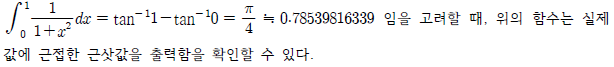

In [52]:
def mvtpi(N):
    
    return mvtsum(N) * 4

In [53]:
mvtpi(100)

3.147068644459692

In [54]:
mvtpi(1000)

3.1419337916585253

In [55]:
mvtpi(10000)

3.1415664646157206

In [56]:
mvtpi(100000)

3.1415830141614

In [57]:
def MonteCarloPi(N):
    import random
    acc = 0
    for i in range(N):
        x = random.random()
        y = random.random()
        if x*x + y*y <= 1:
            acc = acc + 1
            
    return (acc/N) * 4

In [58]:
MonteCarloPi(100)

2.92

In [59]:
MonteCarloPi(1000)

3.24

In [60]:
MonteCarloPi(10000)

3.1304

In [61]:
MonteCarloPi(100000)

3.1372

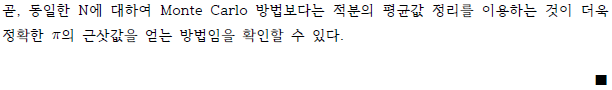

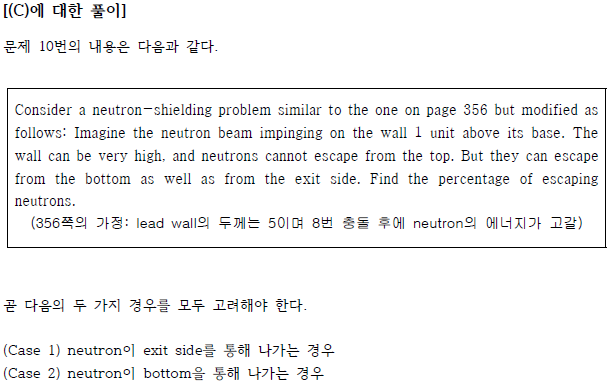

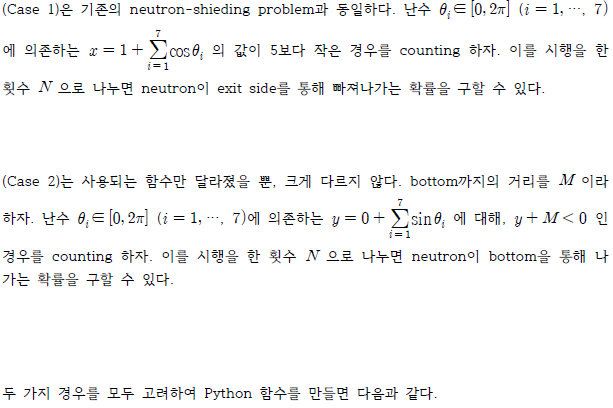

In [62]:
def neutronshield_addbottom(N, M):
    import random
    import math
    acc = 0
    for i in range(N):
        
        a1 = random.random() * 2 * math.pi
        a2 = random.random() * 2 * math.pi
        a3 = random.random() * 2 * math.pi
        a4 = random.random() * 2 * math.pi
        a5 = random.random() * 2 * math.pi
        a6 = random.random() * 2 * math.pi
        a7 = random.random() * 2 * math.pi
        
        x = 1 + math.cos(a1) + math.cos(a2) + math.cos(a3) + math.cos(a4) + math.cos(a5) + math.cos(a6) + math.cos(a7)
        y =  math.sin(a1) + math.sin(a2) + math.sin(a3) + math.sin(a4) + math.sin(a5) + math.sin(a6) + math.sin(a7)
        
        if x > 4 or y + M < 0:
            acc = acc + 1
        
    return acc / N

In [63]:
neutronshield_addbottom(1000,4)

0.069

In [64]:
neutronshield_addbottom(10000, 4)

0.0729

In [65]:
neutronshield_addbottom(100000,4)

0.07042

In [66]:
neutronshield_addbottom(1000000,4)

0.06941

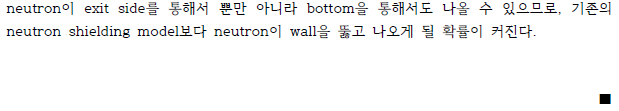

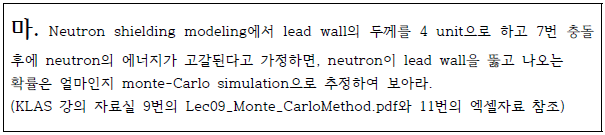

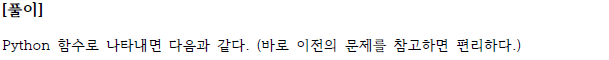

In [67]:
def neutronshield(N):
    import random
    import math
    acc = 0
    for i in range(N):
        
        a1 = random.random() * 2 * math.pi
        a2 = random.random() * 2 * math.pi
        a3 = random.random() * 2 * math.pi
        a4 = random.random() * 2 * math.pi
        a5 = random.random() * 2 * math.pi
        a6 = random.random() * 2 * math.pi
        
        x = 1 + math.cos(a1) + math.cos(a2) + math.cos(a3) + math.cos(a4) + math.cos(a5) + math.cos(a6)
        
        if x > 4:
            acc = acc + 1
        
    return acc / N

In [68]:
neutronshield(1000)

0.041

In [69]:
neutronshield(10000)

0.0427

In [70]:
neutronshield(100000)

0.04166

In [71]:
neutronshield(1000000)

0.041419

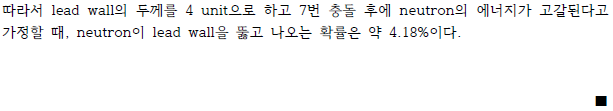